   Sample #  Best Accuracy                                Best SVM Parameters
0         1       0.932667    {'Kernel': 'rbf', 'Nu': 0.134, 'Epsilon': 0.25}
1         2       0.937667    {'Kernel': 'rbf', 'Nu': 0.102, 'Epsilon': 0.36}
2         3       0.938667   {'Kernel': 'rbf', 'Nu': 0.109, 'Epsilon': 0.491}
3         4       0.934000   {'Kernel': 'rbf', 'Nu': 0.128, 'Epsilon': 0.072}
4         5       0.943167   {'Kernel': 'rbf', 'Nu': 0.103, 'Epsilon': 0.344}
5         6       0.919833   {'Kernel': 'rbf', 'Nu': 0.148, 'Epsilon': 0.038}
6         7       0.908500  {'Kernel': 'poly', 'Nu': 0.105, 'Epsilon': 0.494}
7         8       0.933333   {'Kernel': 'rbf', 'Nu': 0.133, 'Epsilon': 0.494}
8         9       0.945500   {'Kernel': 'rbf', 'Nu': 0.103, 'Epsilon': 0.248}
9        10       0.895000  {'Kernel': 'poly', 'Nu': 0.126, 'Epsilon': 0.303}


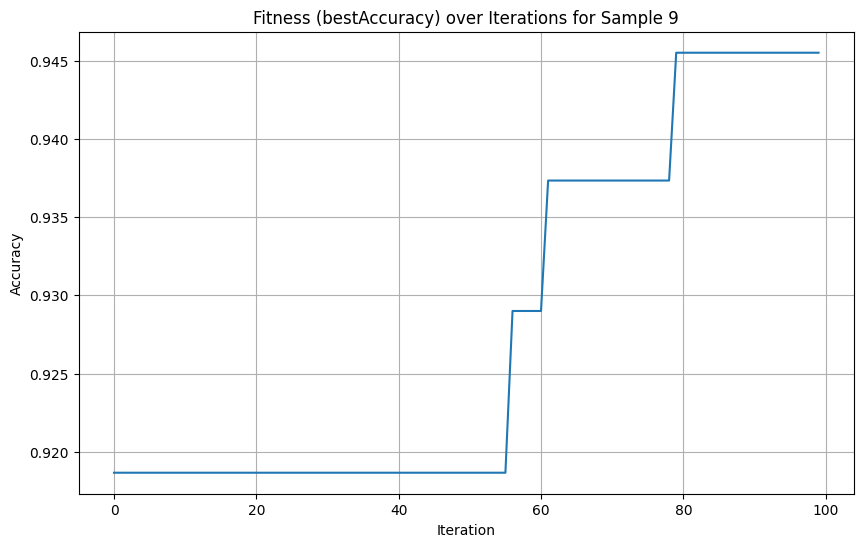

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import random

# 1. Load the Letter Recognition dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar',
           'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
data = pd.read_csv(url, header=None, names=columns)

# Encode labels
le = LabelEncoder()
data['letter'] = le.fit_transform(data['letter'])

# Separate features and labels
X = data.drop('letter', axis=1)
y = data['letter']

# 2. Create 10 random samples
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

# 3. Optimize SVM for each sample
results = []
best_overall_accuracy = 0
best_overall_history = []
best_sample_idx = 0

for idx, (X_train, X_test, y_train, y_test) in enumerate(samples):
    best_acc = 0
    best_params = {}
    acc_history = []

    for iter in range(100):
        # Random hyperparameters
        kernel = random.choice(['linear', 'rbf', 'poly'])
        nu = random.uniform(0.1, 1.0)
        epsilon = random.uniform(0.001, 0.5)  # though NuSVC doesn't use epsilon, we just track it

        model = NuSVC(kernel=kernel, nu=nu)
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)

            if acc > best_acc:
                best_acc = acc
                best_params = {'Kernel': kernel, 'Nu': round(nu, 3), 'Epsilon': round(epsilon, 3)}
        except:
            # Sometimes invalid nu value, skip
            pass

        acc_history.append(best_acc)

    results.append((idx+1, best_acc, best_params))

    # Check for best overall
    if best_acc > best_overall_accuracy:
        best_overall_accuracy = best_acc
        best_overall_history = acc_history
        best_sample_idx = idx+1

# 4. Create results table
results_df = pd.DataFrame(results, columns=['Sample #', 'Best Accuracy', 'Best SVM Parameters'])
print(results_df)

# 5. Plot convergence graph
plt.figure(figsize=(10,6))
plt.plot(best_overall_history)
plt.title(f"Fitness (bestAccuracy) over Iterations for Sample {best_sample_idx}")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
